# Clean and Analyze Employee Exit Surveys

# Introduction

This is a project prepared by DataQuest.io for a 'Data Analyst' study path on their platform

In this project, I'll play the role of data analyst who will analyze data from the Employee Exit Surveys:
1. Employee Exit Survey - DETE (https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
2. TAFE employee exit survey (https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

The goal of this project will be to find out answers for the - stakeholders' following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv("dete-exit-survey-january-2014.csv")
tafe_survey = pd.read_csv("tafe-exit-surveydecember-2013.csv", encoding="latin1")

# Exploring details of dete_survey
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [2]:
# Summarizing missing values:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [3]:
# Exploring details of dete_survey
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [4]:
# Summarizing missing values:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge.     Current Age                                                  106
Employment Type.     Employment Type                                         106
Classification.     Classification                                           106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

At first glance at the database I may draw the following observations:

- The data frame of dete_surveys introduces values "Not Stated" (see for ex: "DETE start date" column) which correspond to missing values, however, they are not marked as NaN, therefore they are not identified as missing values by the system.
- Both datasets consist of columns that are not necessary for my analysis.
- Both datasets have columns that represent the same information but have different names.

# 2. Labeling correctly missing values and dropping unnecessary columns

In [5]:
# Again read in DETE survey marking "Not Stated" as NaN
dete_survey = pd.read_csv("dete-exit-survey-january-2014.csv", na_values = "Not Stated")

In [6]:
# Drop unnecessary columns in both dataframes:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# 3. Unifying the headers

In [7]:
# Renaming DETE dataframe columns names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [8]:
# Renaming TAFE dataframe columns names
tafe_survey_updated = tafe_survey_updated.rename(columns= {
    "Record ID":"id",
    "CESSATION YEAR":"cease_date",
    "Reason for ceasing employment":"separationtype",
    "Gender. What is your Gender?":"gender",
    "CurrentAge. Current Age":"age",
    "Employment Type. Employment Type":"employment_status",
    "Classification. Classification":"position",
    "LengthofServiceOverall. Overall Length of Service at Institute (in years)":"institute_service"
})

tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


# 4. Selecting Relevant Data

This project is focusing on the analysis of the survey respondents who resigned. That is why data should be filtered selecting only the separation types corresponding to the 'Resignation'.

In [9]:
# Count of the unique values in Separation Type:
print(dete_survey_updated["separationtype"].value_counts())
print("\n")
print(tafe_survey_updated["separationtype"].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In order to answer the first question of the stakeholders, I need to focus my analysis on the employees who resigned from the job. That is why I will extract the observation for all kinds of resignations.

In [10]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains("Resignation").copy()]
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"]=="Resignation"].copy()

# 5. Verifying columns containing dates

Before moving on to analyzing data it is important to verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). I will check whether there are any anomalies in the columns containing dates, that is if there are a small number of values that are unrealistically high or low.

In [11]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [12]:
# Extract years from the dates and convert them to a float type
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract("([1-2][0-9]{3})").astype("float")

# Extra check of the dates and outliers if exist
dete_resignations["cease_date"].value_counts().sort_index()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [13]:
dete_resignations["dete_start_date"].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [14]:
tafe_resignations["cease_date"].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

The analysis above doesn't highlight any major issues with the 'date' variable. However, it is clear that the years in both data frames have different intervals. Nevertheless, since I am not interested in analyzing the results by year, I will leave them as they are.

The valuable information at this stage of the analysis would be to understand the length of time an employee spent in a workplace, that is their "years of service". The TAFE data frame already has a variable "institute_service" that represents the number of years an employee has worked. I will create an equivalent variable in the DETE data frame.

In [15]:
# Creating a missing column matching TAFE "institute_service"
dete_resignations["institute_service"] = dete_resignations["cease_date"]-dete_resignations["dete_start_date"]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
dete_resignations["institute_service"].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

# 6. Identification of dissatisfied employees

The next step in the analysis is to identify any employees who resigned due to dissatisfaction at the workplace. In order to identify such individuals I have selected a key-phrases that would indicate the dissatisfaction:

1. tafe_survey_updated:

    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction

2. dafe_survey_updated:

    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload
    
In order to simplify the layout of those factors I will create a new column called "dissatisfied", where each employee will be identified by either:
    - "True" value, in case of resignation due to the dissatisfaction
    - "False" value, in case of the resignation due to the other, not related factor
    - "NaN" value for any missing information

In [17]:
# Understand the unique values
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [18]:
# Understand the unique values
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [19]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == "-":
        return False
    else:
        return True

# TAFE update the values in columns related to dissatisfaction to be either True, False, or NaN
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [20]:
# DETE update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    162
True     149
Name: dissatisfied, dtype: int64

# 7. Combining dataframes

In [21]:
# Adding a column to id the dataframesource
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

# Combining both datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True, sort=False)

In [22]:
# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                                                  0
south_sea                                                                      3
aboriginal                                                                     7
disability                                                                     8
nesb                                                                           9
business_unit                                                                 32
classification                                                               161
region                                                                       265
role_start_date                                                              271
dete_start_date                                                              283
LengthofServiceCurrent. Length of Service at current workplace (in years)    290
Employment Type.     Employment Type                                         290
CurrentAge.     Current Age 

In [23]:
# There are still unnecessary columns in my database. 
# I will drop columns with more than 500 non null values.
combined_updated = combined.dropna(thresh=500, axis=1).copy()
combined_updated.shape

(651, 6)

# 8. "Institute_service" column cleaning

In [24]:
combined_updated["institute_service"].value_counts().head(6)

Less than 1 year    73
1-2                 64
3-4                 63
5-6                 33
11-20               26
5.0                 23
Name: institute_service, dtype: int64

The above column contains values in a couple of different forms, which makes it difficult to correctly analyze. I will apply the definition inspired by the Business Wire article "Age is Just a Number: Engage Employees by Career Stage, Too". I will divide the working years into categories representing the career stage of the employee:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [25]:
# Change type of the series in order to apply 
# vectorized string methods.
combined_updated["institute_service_up"] = combined_updated["institute_service"].astype("str").str.extract(r'(\d+)')
combined_updated["institute_service_up"] = combined_updated["institute_service_up"].astype("float")

#Check if the extracted years are correct
combined_updated['institute_service_up'].value_counts().sort_index

<bound method Series.sort_index of 1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64>

In [26]:
def career_stage(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return "New"
    elif (val>=3) & (val <7):
        return "Experienced"
    elif (val>=7) & (val<11):
        return "Established"
    elif val >= 11:
        return "Veteran"

combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(career_stage)

# Check of the new column
combined_updated["service_cat"].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

# 9. Back to the "dissatisfied" analysis

In [27]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [28]:
# Filling the missing values with the most occuring value
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(value=False)

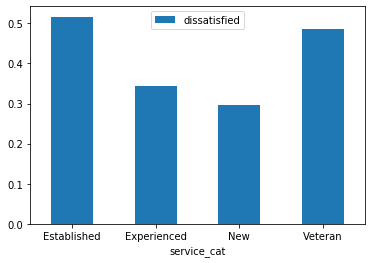

In [29]:
pv_dissatisfied = combined_updated.pivot_table(index="service_cat" , values="dissatisfied")
%matplotlib inline
pv_dissatisfied.plot(kind="bar", rot=0)

As can be seen in the bar chart above, workers with 7 and more years of the service are more prone to resign because of job dissatisfaction. This reflects the reality of today's job marketplace. The new generations are looking for more challenging and diversified projects. Employees are more likely to switch jobs every few years in order to not fall into the routine and maintain a constant interest in their work. This is opposed to what ware doing older generations, where having a stable, same job for most of your life, was associated with professional success.

The preliminary analysis of the Employee Exit Survey in a frame of the DataQuest.io project ends here. There are still many things that could be improved in the database, and insights to analyze, but this will be a subject to another project.